# Chapter Two - Hands on Machine Learning...

Using the flowchart below, this notebook documents the process as noted in Chapter Two of **_Hands on Machine Learnign with Scikit-Learn, Keras and Tensorflow_**.

https://github.com/PatThompson1306/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb

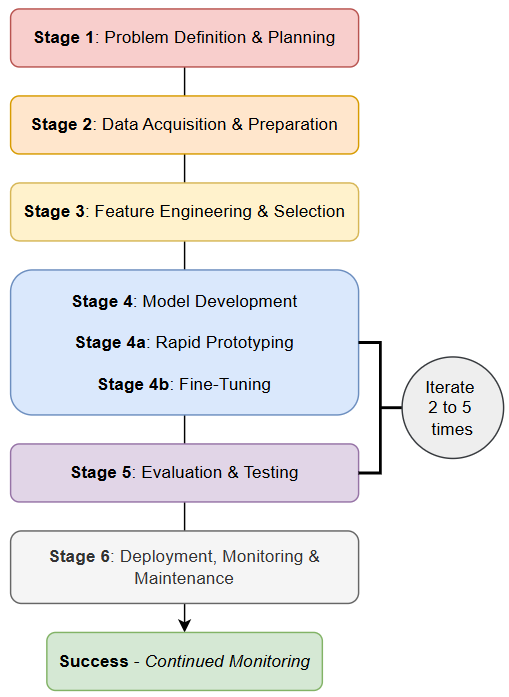

## Problem Definition & Planning

The book describes the requirement for a predictive model to provide media housing prices for a geographic area. 

The data set will come from a census data capture.

From this we can deduce that the task will likely be - 

**Supervised** - the data will be labelled

**A regression task** - using multiple features (multiple regression) the task is to provide a single value predictio (univariate regression)

**Batch learning** - the data is provided in oneset, there is no continuous update needed.

I need to understand a performance measure for how accurate any predictions my model makes will be.  For this I will used the **root mean square** method.

The root mean square error (RMSE) is a way to measure how wrong predictions are in a regression task.  Here's the simple breakdown:

1. Take each prediction error - For every data point, subtract your predicted value from the actual value
2. Square those errors - This makes all errors positive and punishes bigger errors more heavily
3. Find the average (mean) of those squared errors
4. Take the square root - This converts the result back to the same units as your original data

**Why it's useful:**

1. It tells you the typical size of your prediction errors in real-world units (dollars, meters, etc.)
2. Bigger errors get penalised more heavily because of the squaring step
3. It's easy to interpret: if your RMSE is £10, your predictions are typically off by about £10

*Example: If you're predicting house prices and your RMSE is £15,000, this means your model's predictions are typically about £15,000 away from the actual prices. The lower your RMSE, the better your model is performing.*

## Data Aquisition and Preparation

In this instance, I have downloaded the data set for this task - 

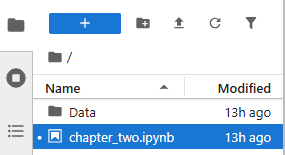

However it may be that it is preferable to write a script or function to do this automatically depending on where the data is.

In this instance however, we will read the data into a pandas dataframe and take a look at the first five rows

In [1]:
import pandas as pd
import numpy as np

data_path = "C:\\Users\\UserPC\\Desktop\\my_folder\\Learning alongside DProf\\Hands on Machine Learning (Book)\\Data\\housing.csv"
housing_data = pd.read_csv(data_path)


We will then look to have a quick look at the data to understand what it is made up of.

In [2]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Here we can see that there are 10 columns (attributes) and in 9 of 10 cases 20,640 data points (total_bedrooms indicates only 20,433 data points)
We can also see tha all attributes are numerical (float64) aside from *ocean_proximity* which is an object -- because this data is from a .csv, it can only be text (string) data.
If we look at the *value_counts()* for ocean_proximity, we can see that it is clearly categorical text - it provides categories of where houses are in proximity to the ocean.

In [3]:
housing_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Calling the *describe()* shows us a summary of the numerical data attributes

In [4]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


A quick way to get a feel for the numeric data s to plot a histogram for each numeric value.

A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis).

We can plot all in one go by calling the *hist()* method on the dataframe, but clearly a histogram of latitude or longitude is pointless, so creating a list of attributeds and plotting those is more meaningful.

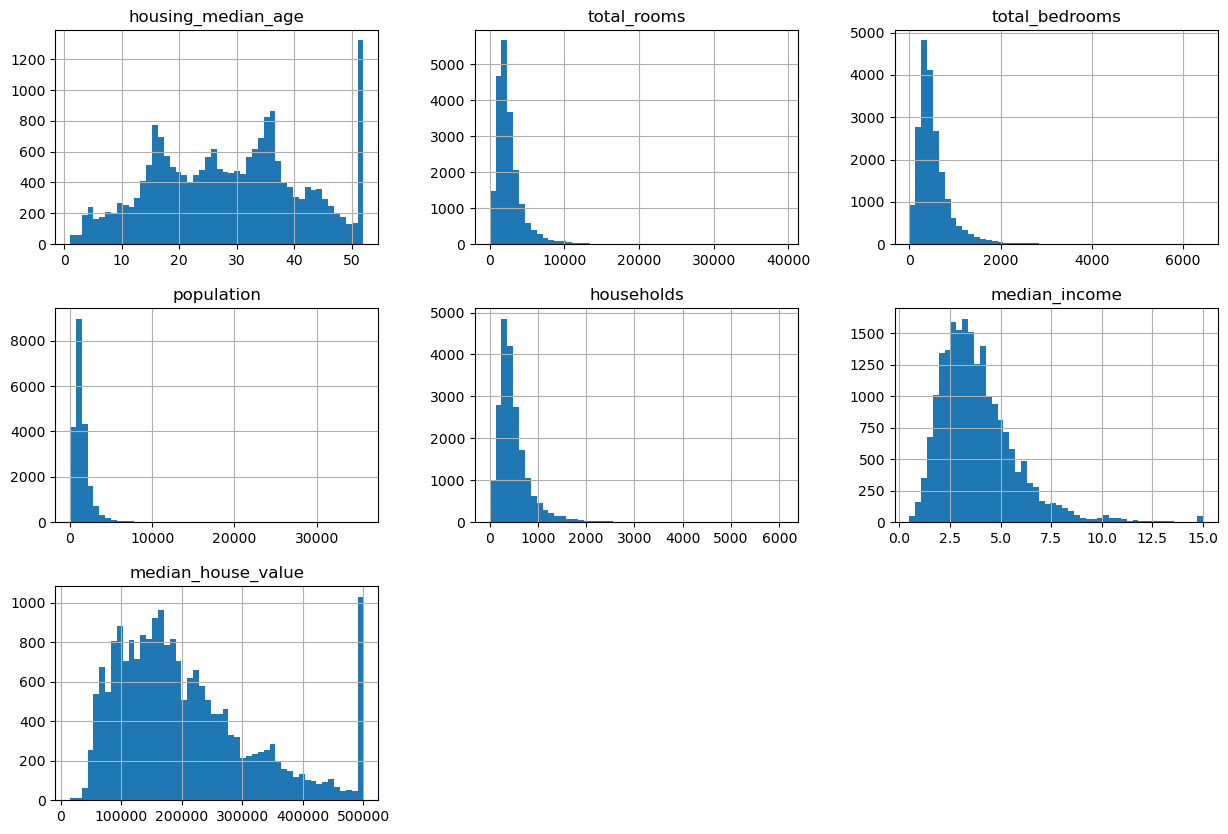

In [6]:
import matplotlib.pyplot as plt
attributes = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]
housing_data[attributes].hist(bins=50, figsize=(15, 10))
plt.show()


Looking at these histograms shows a number of things.

1.  The *median_income* chart is not shown in currency amounts - this is because the data has been scaled with each point roughly equating to £10,000 (so 3 would be £30,000)
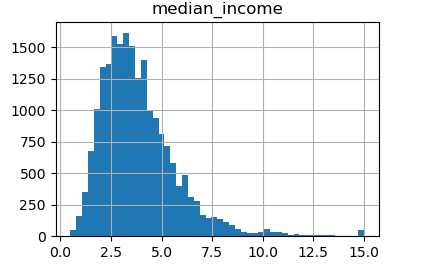

2. *housing_median_age* and *median_house_value* has also been capped.  In this regression task, *median_house_value* will be our target attribute (the one we will later try to predict), so having data capped at £50,000 (which essesntially means +> £50,000) is an issue as the learning may identify that no price is ever over £50,000

As we are still in **Stage 2**, it is crucial that we now separate out our test data from our trainign data - this is to prevent inadvertently detecting erroneous patterns or allowing bias to creep in.

Convention suggests a 20% split into the test data set and there are multiple ways of achieving this;

